In [1]:
import torch as t
from torch.autograd import Variable as V
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

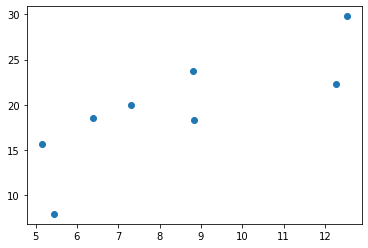

In [2]:
t.manual_seed(1000)
def get_fake_data(batch_size=8):
    x=t.rand(batch_size,1)*20
    y=x*2+(1+t.randn(batch_size,1))*3
    return x,y
x,y = get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

In [3]:
w=V(t.rand(1,1),requires_grad=True)
b=V(t.zeros(1,1),requires_grad=True)
lr=0.001


tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.]]) tensor([[ 2.8902],
        [ 4.7443],
        [ 6.5984],
        [ 8.4524],
        [10.3065],
        [12.1606],
        [14.0147],
        [15.8688],
        [17.7229],
        [19.5770],
        [21.4311],
        [23.2852],
        [25.1393],
        [26.9934],
        [28.8475],
        [30.7016],
        [32.5557],
        [34.4098],
        [36.2639],
        [38.1180]])


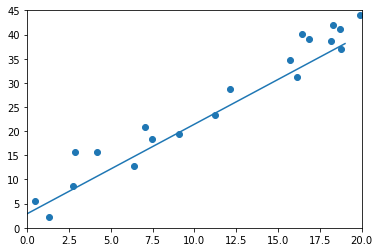

In [4]:
for i in range(8000):
    x,y=get_fake_data()
    x,y=V(x),V(y)
    
    y_pred=x.mm(w)+b.expand_as(y)
    
    loss=0.5*(y_pred-y)**2
    
    loss=loss.sum()
    

    loss.backward()
    
    w.data.sub_(lr*w.grad.data)
    b.data.sub_(lr*b.grad.data)
    
    w.grad.data.zero_()
    b.grad.data.zero_()

    
    if i%1000 ==0:
        display.clear_output(wait=True)
        x=t.arange(0,20,1.0).view(-1,1)
        y=x.mm(w.data)+b.data.expand_as(x)
        print(x,y)
        plt.plot(x.numpy(),y.numpy())
        x2,y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy())
        plt.xlim(0,20)
        plt.ylim(0,45)
        plt.show()
        plt.pause(1)
# print(w.data.squeeze()[0],b.data.squeeze()[0])